In [9]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('cats-vs-dogs')
jovian.set_colab_id('1FKSIwF_66oAiHTdgtqIxgqZEsSJ8_YWm')

# cats-vs-dogs

Use the "Run" button to execute the code.

In [10]:
!pip install jovian --upgrade --quiet

In [11]:
import jovian

## Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, random
import PIL
from keras.preprocessing.image import load_img

import warnings
warnings.simplefilter('ignore')

## Reading the dataset

### Downloading the dataset

Since the data for this task is huge, we can use `opendatasets` library to download it and use it in the notebook.

In [13]:
!pip install opendatasets --quiet

In [14]:
import opendatasets as od
od.download('https://www.kaggle.com/shaunthesheep/microsoft-catsvsdogs-dataset') # url for the dataset

100%|██████████| 788M/788M [00:25<00:00, 32.0MB/s]


In [15]:
img_path = []
label = []

base_dir = '/content/microsoft-catsvsdogs-dataset/PetImages' # base directory of the data

for class_name in os.listdir(base_dir): # for folder name in base directory
    for path in os.listdir(base_dir + '/' + class_name): # creating the path to access the data
        if class_name == 'Cat': # if folder name is Cat
            label.append(0)
        else: # folder name Dog
            label.append(1)
        img_path.append(os.path.join(base_dir, class_name, path)) # getting the path of the image 

In [16]:
# creating a dataframe with the image path and its respective label

data = pd.DataFrame()
data['image_path'] = img_path
data['labels'] = label
data.head(3)

,image_path,labels
0,/content/microsoft-catsvsdogs-dataset/PetImage...,1
1,/content/microsoft-catsvsdogs-dataset/PetImage...,1
2,/content/microsoft-catsvsdogs-dataset/PetImage...,1


In [17]:
# Execute this to save new versions of the notebook
jovian.commit(project="cats-vs-dogs")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/santhosh-0-3/cats-vs-dogs


'https://jovian.ai/santhosh-0-3/cats-vs-dogs'

## Data Cleaning

In [18]:
# getting all the irrelevant files

for img in data['image_path']: # for all the image path
    if '.jpg' not in img: # checking whether .jpg is not present in the image path
        print(img) # printing the image path

/content/microsoft-catsvsdogs-dataset/PetImages/Dog/Thumbs.db
/content/microsoft-catsvsdogs-dataset/PetImages/Cat/Thumbs.db


In [19]:
additional_files = [] # empty list

for image in data['image_path']: # for all the image path
    try:
        img = PIL.Image.open(image) # trying to open the image for the respective path
    except: # if cannot open
        additional_files.append(image) # appending the path to additional_files

additional_files

['/content/microsoft-catsvsdogs-dataset/PetImages/Dog/Thumbs.db',
 '/content/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg',
 '/content/microsoft-catsvsdogs-dataset/PetImages/Cat/666.jpg',
 '/content/microsoft-catsvsdogs-dataset/PetImages/Cat/Thumbs.db']

In [20]:
# getting only the files that are does not cause any error

new_data = data[~data['image_path'].isin(additional_files)]

## Visualization

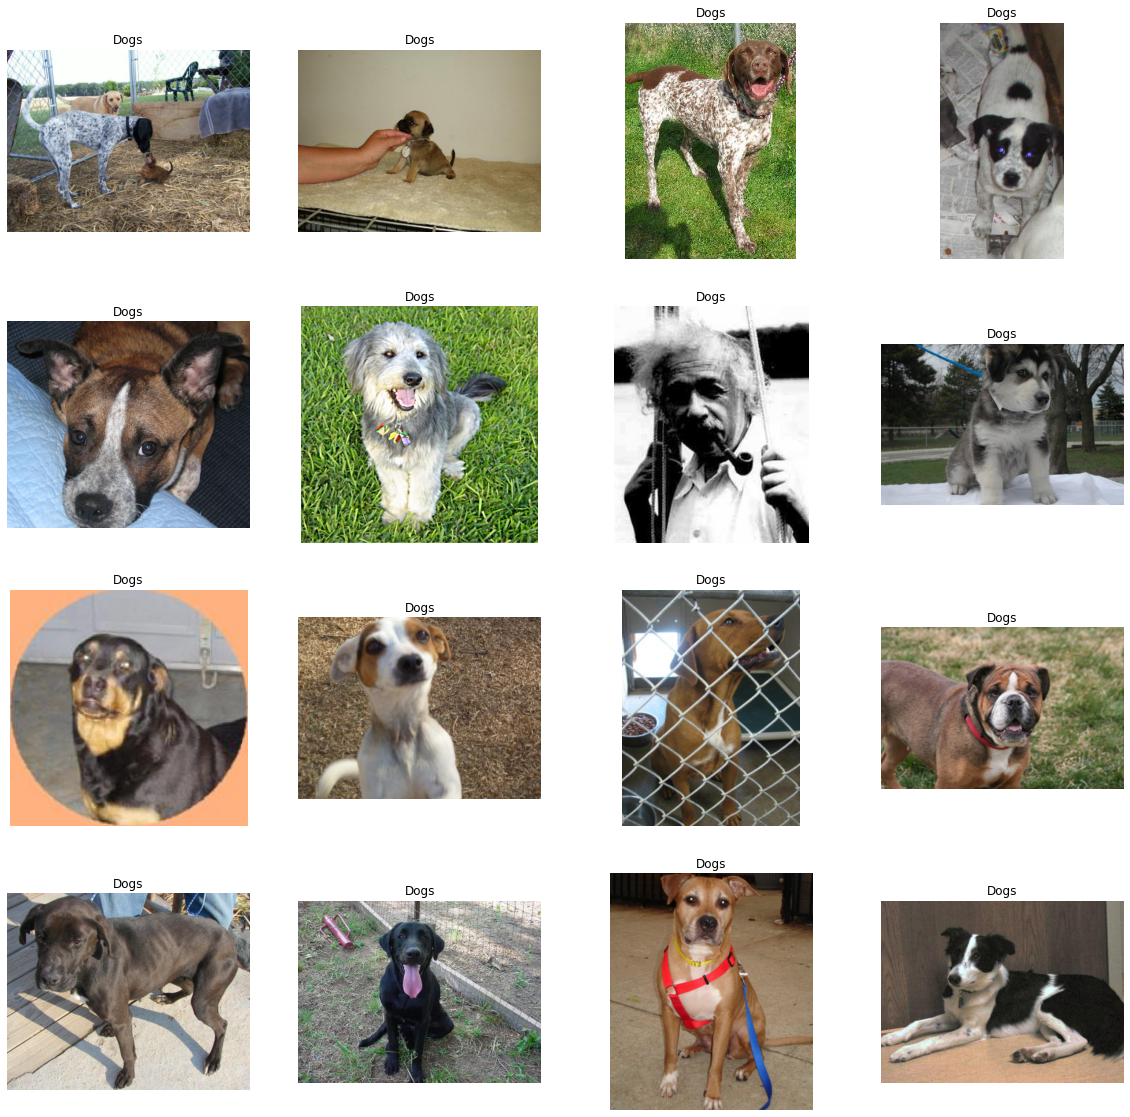

In [21]:
plt.figure(figsize = (20, 20)) # setting the figure size

temp = new_data[new_data['labels'] == 1]['image_path'] # getting only the paths of dogs from the dataframe
start = random.randint(0, len(temp)) # selecting a random starting number
files = temp[start:start+16] # getting 16 image path from the starting number

for index, file in enumerate(files):
    plt.subplot(4, 4, index+1) # subplot of 4 rows and 4 columns
    img = load_img(file) # loading the image
    img = np.array(img) # converting the image to an array
    plt.imshow(img) # plotting the image
    plt.title('Dogs') # title of the plot
    plt.axis('off')

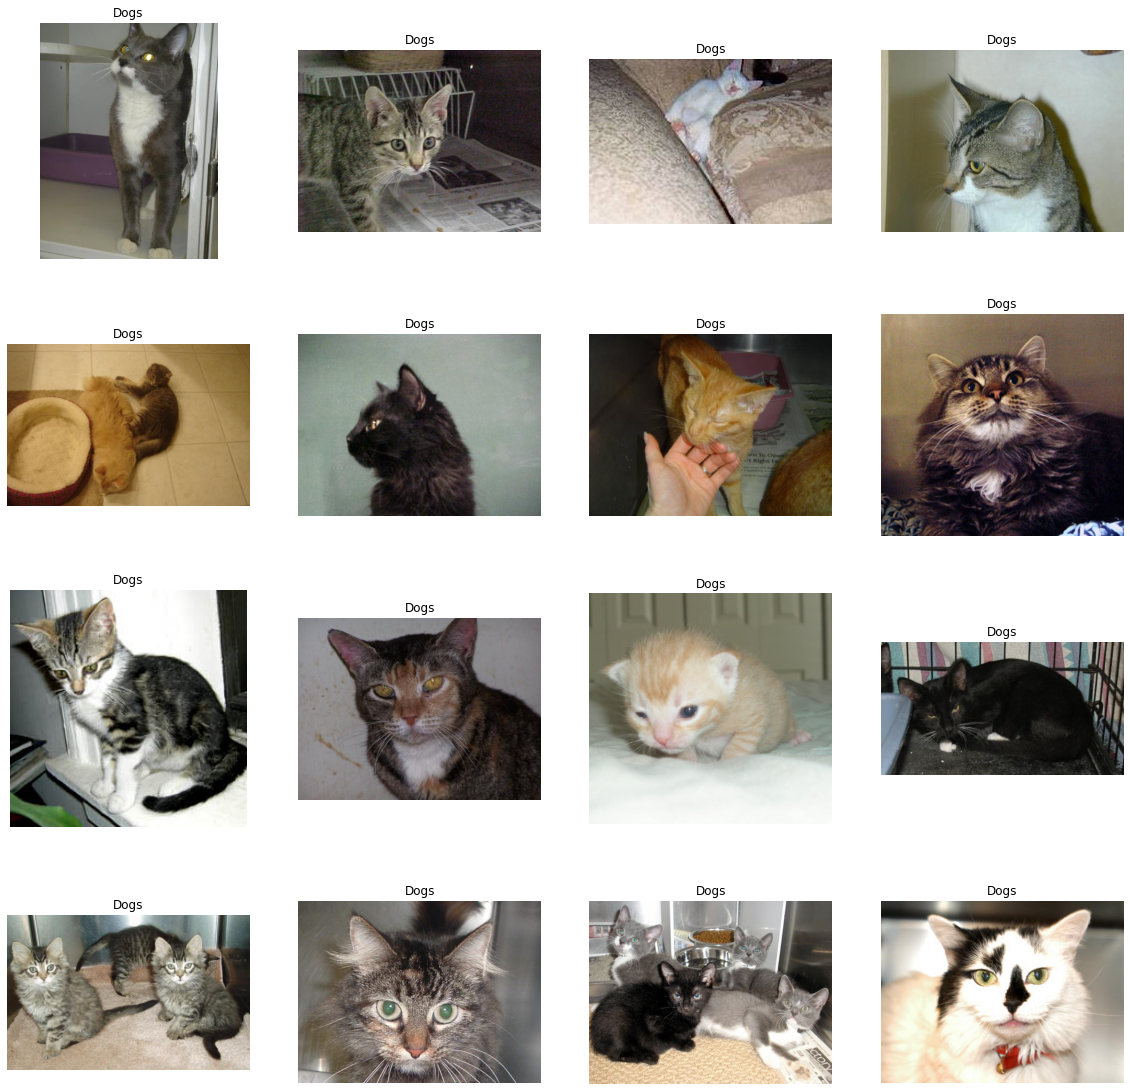

In [22]:
plt.figure(figsize = (20, 20)) # setting the figure size

temp = new_data[new_data['labels'] == 0]['image_path'] # getting only the paths of dogs from the dataframe
start = random.randint(0, len(temp)) # selecting a random starting number
files = temp[start:start+16] # getting 16 image path from the starting number

for index, file in enumerate(files):
    plt.subplot(4, 4, index+1) # subplot of 4 rows and 4 columns
    img = load_img(file) # loading the image
    img = np.array(img) # converting the image to an array
    plt.imshow(img) # plotting the image
    plt.title('Dogs') # title of the plot
    plt.axis('off')

In [23]:
# changing the type of labels column to string

new_data['labels'] = new_data['labels'].astype('str') 

In [24]:
from sklearn.model_selection import train_test_split

# performing train test split
# setting a test size of 30%

train, test = train_test_split(new_data, test_size = 0.3, random_state = 42) 

In [25]:
from keras.preprocessing.image import ImageDataGenerator

# using ImageDataGenerator to perform data augmentation on the images on the  training data
train_generator = ImageDataGenerator(
    rescale = 1./255, # normalizing the pixel value of images
    shear_range = 0.2, # specifying the shear range
    zoom_range = 0.2, # specifying the zoom range
    fill_mode = 'nearest', # used for filling points outside the boundries
    horizontal_flip = True, # used for randomly flipping the  inputs horizontally. 
    width_shift_range = 0.1, # specifying the range to be shifted on the left and right sides
    height_shift_range = 0.1, # specifying the range to be shifted on the top and bottom sides
    rotation_range = 15 # specifying the rotation angle
)

# using ImageDataGenerator to perform data augmentation on the images on the validation data
val_generator = ImageDataGenerator(rescale = 1./255) # normalizing the pixel value of images

In [26]:
train_iterator = train_generator.flow_from_dataframe(
    train, # data containing the training images
    x_col = 'image_path', # column containing the image path
    y_col = 'labels', # target column
    target_size = (128, 128), # shape of the image 
    batch_size = 15, # batch size for training
    class_mode = 'categorical', # type of classification
)

val_iterator = val_generator.flow_from_dataframe(
    test,# data containing the validation images
    x_col = 'image_path', # column containing the image path
    y_col = 'labels', # target column
    target_size = (128, 128), # shape of the image 
    batch_size = 15, # batch size for validation
    class_mode = 'categorical' # type of classification
)

Found 17498 validated image filenames belonging to 2 classes.
Found 7500 validated image filenames belonging to 2 classes.


## Building the model

In [27]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

In [28]:
# using a sequential model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation =  'relu', input_shape = (128, 128, 3))) # convolutional layer with relu activation function
model.add(BatchNormalization()) # layer for batch normalization
model.add(MaxPooling2D(pool_size=(2, 2))) # layer for max pooling
model.add(Dropout(0.25)) # layer for dropout
 
model.add(Conv2D(64, (3, 3), activation =  'relu')) # convolutional layer with relu activation function
model.add(BatchNormalization()) # layer for batch normalization
model.add(MaxPooling2D(pool_size=(2, 2))) # layer for max pooling
model.add(Dropout(0.25)) # layer for dropout

model.add(Conv2D(128, (3, 3), activation =  'relu')) # convolutional layer with relu activation function
model.add(BatchNormalization()) # layer for batch normalization
model.add(MaxPooling2D(pool_size=(2, 2))) # layer for max pooling
model.add(Dropout(0.25)) # layer for dropout
 
model.add(Flatten()) # flattening the image array
model.add(Dense(512, activation = 'relu')) # Dense layer
model.add(BatchNormalization()) # layer for batch normalization
model.add(Dropout(0.5)) # layer for dropout
model.add(Dense(2, activation = 'softmax')) # Dense layer

In [29]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# early stopping parameter with patience of 10 epochs
early_stopping = EarlyStopping(patience = 10) 
# learing rate reduction when the validation accuracy does not improve
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, 
                                            factor = 0.5, min_lr = 0.00001)

callbacks = [early_stopping, learning_rate_reduction]

In [30]:
# compiling the model with the below mentioned arguments

model.compile(loss = 'categorical_crossentropy', # type of loss
             optimizer = 'rmsprop', # type of optimizer
             metrics = ['accuracy']) # type of metric

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [31]:
# fitting the model with 50 epochs

history = model.fit_generator(train_iterator, epochs = 50, validation_data=val_iterator,
                    callbacks = callbacks, )

Epoch 1/50
1167/1167 [==============================] - 180s 143ms/step - loss: 0.7491 - accuracy: 0.6328 - val_loss: 0.5900 - val_accuracy: 0.6869 - lr: 0.0010
Epoch 2/50
1167/1167 [==============================] - 165s 141ms/step - loss: 0.5716 - accuracy: 0.7102 - val_loss: 0.5406 - val_accuracy: 0.7435 - lr: 0.0010
Epoch 3/50
1167/1167 [==============================] - 165s 141ms/step - loss: 0.5143 - accuracy: 0.7517 - val_loss: 0.4842 - val_accuracy: 0.7787 - lr: 0.0010
Epoch 4/50
1167/1167 [==============================] - 165s 141ms/step - loss: 0.4772 - accuracy: 0.7777 - val_loss: 0.4284 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 5/50
1167/1167 [==============================] - 164s 141ms/step - loss: 0.4505 - accuracy: 0.7935 - val_loss: 0.4229 - val_accuracy: 0.8035 - lr: 0.0010
Epoch 6/50
1167/1167 [==============================] - 163s 139ms/step - loss: 0.4230 - accuracy: 0.8091 - val_loss: 0.3928 - val_accuracy: 0.8349 - lr: 0.0010
Epoch 7/50
1167/1167 [============

In [32]:
# Execute this to save new versions of the notebook
jovian.commit(project="cats-vs-dogs")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/santhosh-0-3/cats-vs-dogs


'https://jovian.ai/santhosh-0-3/cats-vs-dogs'

In [33]:
acc = history.history['accuracy'] # training accuracy
val_acc = history.history['val_accuracy'] # validation accuracy
epochs = range(len(acc)) # number of epochs

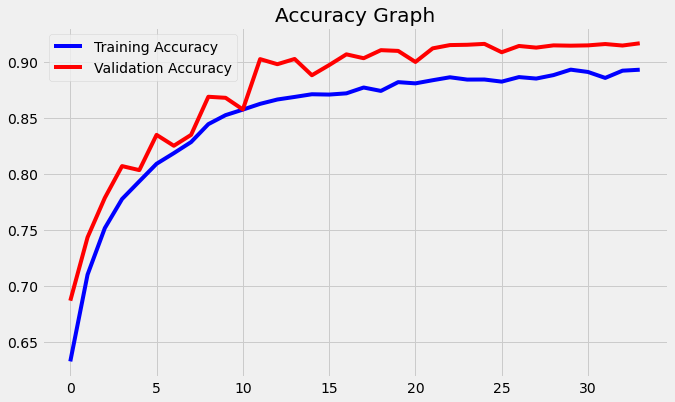

In [34]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy') # line plot for training accuracy
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy') # line plot for validation accuracy
plt.title('Accuracy Graph') # title of the plot
plt.legend() # setting legend for the plot

In [35]:
loss = history.history['loss'] # training accuracy
val_loss = history.history['val_loss'] # validation accuracy

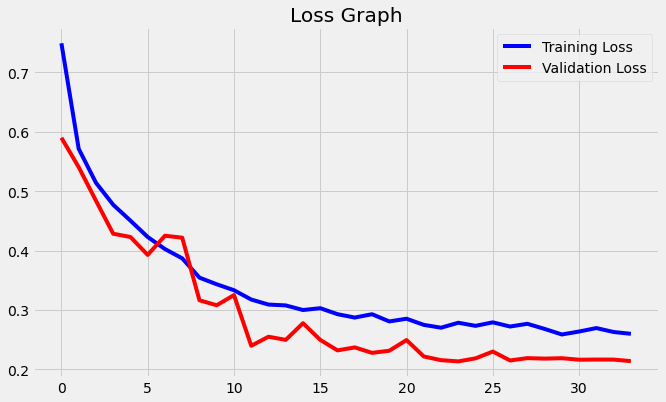

In [36]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (10, 6))

plt.plot(epochs, loss, 'b', label='Training Loss') # line plot of training loss
plt.plot(epochs, val_loss, 'r', label='Validation Loss') # line plot of validation loss
plt.title('Loss Graph') # title of the plot
plt.legend() # setting lrgrnd for the plot
plt.show()

In [38]:
# Execute this to save new versions of the notebook
jovian.commit(project="cats-vs-dogs")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/santhosh-0-3/cats-vs-dogs


'https://jovian.ai/santhosh-0-3/cats-vs-dogs'